## MatplotLib Tutorial

In [46]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [47]:
## Simple Examples
x=np.arange(0,10)
y=np.arange(11,21)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
y

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

**Bar plot**

you can use the bar() function to draw bar graphs:

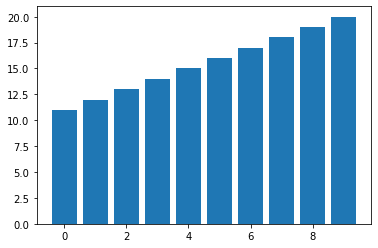

In [49]:
plt.bar(x,y)
plt.show()

## Histograms
A histogram is a graph showing frequency distributions.

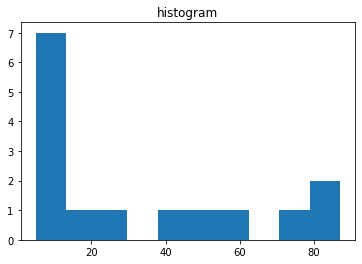

In [50]:
a = np.array([5,87,5,43,5,73,55,54,5,20,5,5,79,5,27]) 
plt.hist(a) 
plt.title("histogram") 
plt.show()

## Box Plot using Matplotlib

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.

**Each section of a boxplot represents 25% of the data**

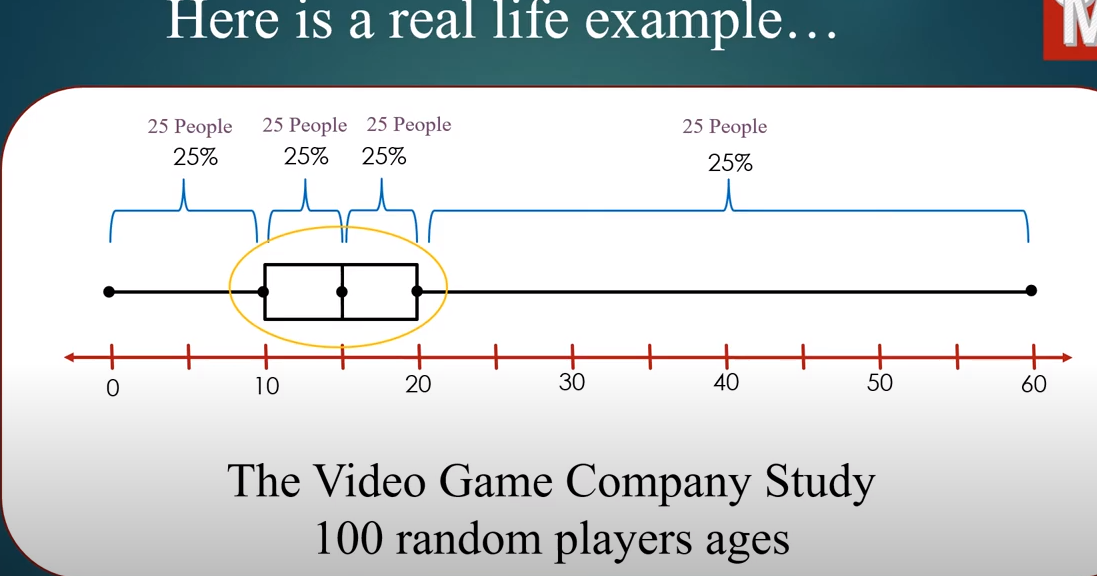

## Question
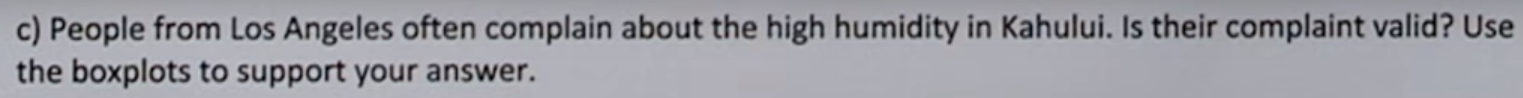

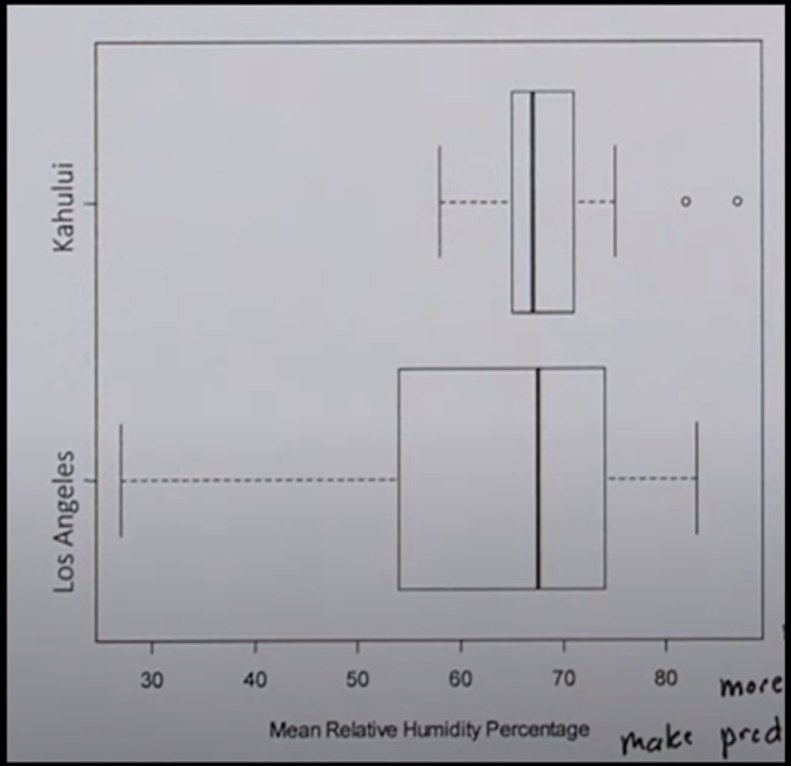

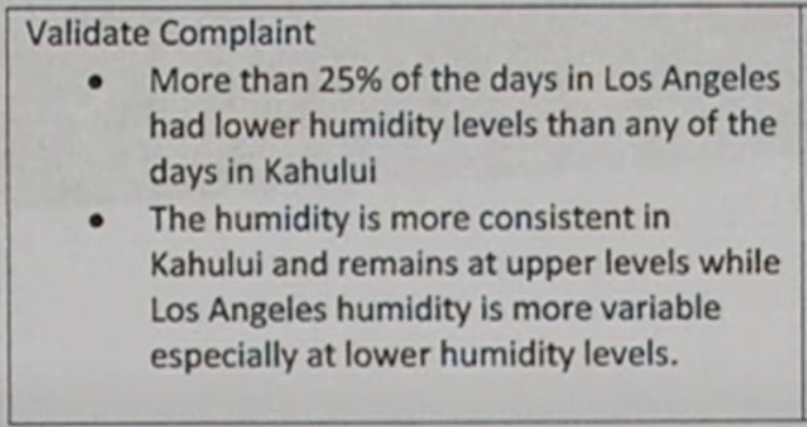

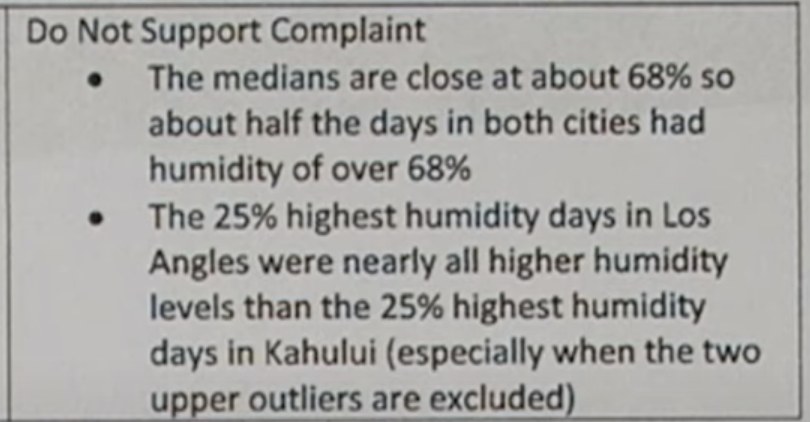

## Python code

In [51]:
# calculate a 5-number summary
from numpy import percentile
from numpy.random import rand
# generate data sample
data = rand(1000)+rand(1000)
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.042
Q1: 0.722
Median: 1.020
Q3: 1.274
Max: 1.907


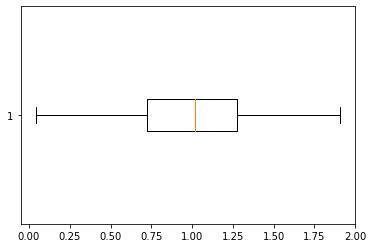

In [52]:
# Creating plot
plt.boxplot(data,vert=False) # Display horizontally
# show plot
plt.show()

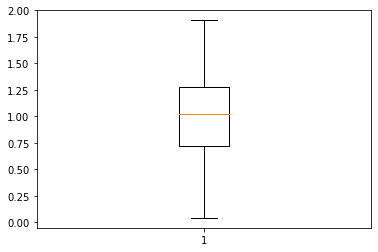

In [53]:
# Creating plot
plt.boxplot(data) # Display vertically
# show plot
plt.show()

## Real life example how to remove outliers using boxplot

In [54]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [55]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

In [56]:
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
boston_df.shape

(506, 13)

## Discover outliers with visualization tools

<AxesSubplot:xlabel='DIS'>

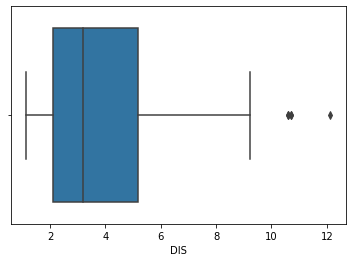

In [58]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])  # Boxplot for 'DIS' feature only

**IQR score**

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data. The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. IQR is somewhat similar to Z-score

In [59]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


## Outliers detection

In [60]:
boston_df_Removed_outliers_from_dataset = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_Removed_outliers_from_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:xlabel='DIS'>

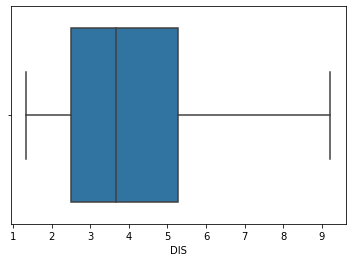

In [62]:
sns.boxplot(x=boston_df_Removed_outliers_from_dataset['DIS'])

## Nice tutorial about boxplot

https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/